# 200_Analysis_Q1B


# _ Question One: Is There a Safest Time for Travel?_

## _ (B): Is it Safer to Drive in the Daytime than in the Night-time?_


## Purpose

We will now begin to analyse and explore our newly validated and prepared datasets. In this notebook we will explore whether there is a safest time for road travel. In particular, we will analyse whether it is safer to drive in the Day-time than in the Night-time. To do this, we will use our date and time columns to see whether more accidents occur at certain times of the day, and how severe these respective accidents are.

### Notebook Contents:

* __1:__ Loading our Datasets
     * __1.1:__ A Closer look at the Data

* __2:__ Time of Day

* __3:__ Accident Severity during the Day/Night     

* __4:__ Day of Week
     * __1.1:__ Normalising the Data
     
* __5:__ Saving to Pickle Files & Creating Data Dictionaries



## Datasets

* __Input__:

* 700_Q1AB_final_prep_1.pkl (Fully prepared dataset 1 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* 700_Q1AB_final_prep_2.pkl (Fully prepared dataset 2 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* 700_Q1AB_final_prep_3.pkl (Fully prepared dataset 3 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* 700_Q1AB_final_prep_4.pkl (Fully prepared dataset 4 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* __Output__: 

* 200_analysis_Q1B_all_day_night_severity.pkl (All accident severity by time of day of UK Road Accidents from 1979 - 2016)


* 200_analysis_Q1B_norm_day_night_severity.pkl (Normalised accident severity by time of day of UK Road Accidents from 1979 - 2016)


* 200_analysis_Q1B_norm_all_by_day.pkl (Normalised total of UK Road Accidents per day of week from 1979 - 2016)

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

## 1.
## Loading the Datasets

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in separate pickle files, we will read in these cleaned datasets for the purpose of answering this research question.

In [2]:
Q1B_1 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_1.pkl')
Q1B_1.shape

(3011743, 17)

In [3]:
Q1B_2 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_2.pkl')
Q1B_2.shape

(3021931, 17)

In [4]:
Q1B_3 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_3.pkl')
Q1B_3.shape

(3420640, 17)

In [5]:
Q1B_4 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_4.pkl')
Q1B_4.shape

(3010896, 17)

## 1.1
## A closer look at the data

In [6]:
Q1B_1.head(2) #print the first two lines of our first dataset

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year
85587,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,bus or coach,male,26 - 35,07,04,1979
85588,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,car,male,46 - 55,07,04,1979


In [7]:
Q1B_4.tail(2) #print the last two lines of our fourth dataset

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year
479546,2016984131316,slight,1,3,29/10/2016,sunday,20:00,917,darkness - lights lit,fine no high winds,dry,car,male,16 - 20,29,10,2016
479547,2016984133416,slight,1,2,25/12/2016,monday,12:30,917,daylight,raining + high winds,wet or damp,car,male,46 - 55,25,12,2016


Above we have hoped to show you an insight into our datasets.

The purpose of this is to show that for Question One (B), we are working with data from _1979 - 2016_ only.

## 2.
## Time of Day

Here, I will add a new column into each dataset called 'Day_Night' which will list whether an accident occurred in the day or the night time. 

First, I will need to split the 'Time' column up into Hour and Minute which I will subsequently use to define whether an accident occured at daytime or nighttime, I will do this using the str.split method.


In [8]:
Q1B_1[['Hour', 'Minute']] = Q1B_1['Time'].str.split(pat = ':', n=-1, expand=True)
Q1B_1.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year,Hour,Minute
85587,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,bus or coach,male,26 - 35,07,04,1979,12,30
85588,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,car,male,46 - 55,07,04,1979,12,30


In [9]:
Q1B_2[['Hour', 'Minute']] = Q1B_2['Time'].str.split(pat = ':', n=-1, expand=True)

In [10]:
Q1B_3[['Hour', 'Minute']] = Q1B_3['Time'].str.split(pat = ':', n=-1, expand=True)

In [11]:
Q1B_4[['Hour', 'Minute']] = Q1B_4['Time'].str.split(pat = ':', n=-1, expand=True)

Now that we have a column containing the hour that each accident occurred in, I will add a new column 'Day_Night' to determine whether an accident occurred in the day or night, based on the new 'Hour' column

In [12]:
newcol_1 = Q1B_1['Hour'] #create new column called 'Day_Night' as a copy of Hour column
new_Q1B_1 = Q1B_1.assign(Day_Night=newcol_1)
new_Q1B_1.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year,Hour,Minute,Day_Night
85587,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,bus or coach,male,26 - 35,07,04,1979,12,30,12
85588,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,car,male,46 - 55,07,04,1979,12,30,12


In [13]:
newcol_2 = Q1B_2['Hour'] #create new column called 'Day_Night' as a copy of Hour column
new_Q1B_2 = Q1B_2.assign(Day_Night=newcol_2)

In [14]:
newcol_3 = Q1B_3['Hour'] #create new column called 'Day_Night' as a copy of Hour column
new_Q1B_3 = Q1B_3.assign(Day_Night=newcol_3)

In [15]:
newcol_4 = Q1B_4['Hour'] #create new column called 'Day_Night' as a copy of Hour column
new_Q1B_4 = Q1B_4.assign(Day_Night=newcol_4)

Once we have created a 'Day_Night' column in our datasets, we will now check that our accident times were recorded using a 24-hour clock.

This allow us to label an accident time as day/night by the hour, meaning twelve o clock will have two values: 12:00 and 00:00, meaning we can easily distinguish between day and night.

In [16]:
new_Q1B_4.loc[(new_Q1B_4['Hour'] == '00')] #print all rows where Hour column is 00

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year,Hour,Minute,Day_Night
2,200501BS00003,slight,2,1,06/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,26 - 35,06,01,2005,00,15,00
3,200501BS00003,slight,2,1,06/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,car,male,56 - 65,06,01,2005,00,15,00
15,200501BS00012,slight,1,1,16/01/2005,monday,00:42,12,darkness - lights lit,fine no high winds,dry,car,male,26 - 35,16,01,2005,00,42,00
23,200501BS00019,serious,2,1,20/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,motorcycle,male,46 - 55,20,01,2005,00,15,00
24,200501BS00019,serious,2,1,20/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,car,male,36 - 45,20,01,2005,00,15,00
123,200501BS70049,slight,1,1,25/02/2005,saturday,00:11,12,darkness - lights lit,raining no high winds,wet or damp,taxi/private hire car,male,56 - 65,25,02,2005,00,11,00
134,200501BS70058,slight,2,1,01/03/2005,wednesday,00:30,12,darkness - lights lit,fine no high winds,wet or damp,car,female,75+,01,03,2005,00,30,00
135,200501BS70058,slight,2,1,01/03/2005,wednesday,00:30,12,darkness - lights lit,fine no high winds,wet or damp,pedal cycle,male,46 - 55,01,03,2005,00,30,00
173,200501BS70084,slight,2,1,13/03/2005,monday,00:15,12,darkness - lights lit,fine no high winds,dry,pedal cycle,male,36 - 45,13,03,2005,00,15,00
242,200501BS70129,slight,1,1,06/04/2005,thursday,00:32,12,darkness - lights lit,fine no high winds,dry,car,male,36 - 45,06,04,2005,00,32,00


We are happy to see now that accident hours were recorded using a 24-hour clock.

We will now use a mapping function to assign the day/night value column for each accident.

As our Day_Night column contains data only for the hour and not minute, we will define day-time as any time between 6am and 5pm, and night time as any time between 6pm and 5am. We have used [this  link](https://www.englishclub.com/vocabulary/time-day-night.htm) to determine this.

In [17]:
day_night_map = {'06':'Day', '07':'Day', '08':'Day', '09':'Day', '10':'Day', '11':'Day', '12':'Day', '13':'Day', '14':'Day', '15':'Day', '16':'Day', '17':'Day', '18':'Night', '19':'Night', '20':'Night', '21':'Night', '22':'Night', '23':'Night', '00':'Night', '01':'Night', '02':'Night', '03':'Night', '04':'Night', '05':'Night' } #define our mapping function

To apply this map function:

* We must specify the column which we want to apply the mapping function to.
* We then must apply a lambda function to our map, which will replace any occurrence of a value that is present in the map, otherwise it will leave the value as the original.

We have used code from [this](https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers) stack overflow question to carry out the mapping function.

In [18]:
new_Q1B_1['Day_Night'] = new_Q1B_1['Day_Night'].apply(lambda s: day_night_map.get(s) if s in day_night_map else s) #apply mapping function to each value in 'Day_Night' column
new_Q1B_2['Day_Night'] = new_Q1B_2['Day_Night'].apply(lambda s: day_night_map.get(s) if s in day_night_map else s)
new_Q1B_3['Day_Night'] = new_Q1B_3['Day_Night'].apply(lambda s: day_night_map.get(s) if s in day_night_map else s)
new_Q1B_4['Day_Night'] = new_Q1B_4['Day_Night'].apply(lambda s: day_night_map.get(s) if s in day_night_map else s)

In [19]:
new_Q1B_1.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year,Hour,Minute,Day_Night
85587,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,bus or coach,male,26 - 35,07,04,1979,12,30,Day
85588,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,car,male,46 - 55,07,04,1979,12,30,Day


### Group by Day_Night Column

Since we are focusing on the time in which accidents occur, I will group accidents based on the 'Day_Night' column.

This will produce a `groupby` object, which contains groups in a Python `dict`, indexed, in this case, by `Day/Night time` and whose values are the indices of the dataframe rows associated with the corresponding year.

In [20]:
group_by_day_night_1 = new_Q1B_1.groupby('Day_Night')
group_by_day_night_1

In [21]:
group_by_day_night_2 = new_Q1B_2.groupby('Day_Night')
group_by_day_night_2

In [22]:
group_by_day_night_3 = new_Q1B_3.groupby('Day_Night')
group_by_day_night_3

In [23]:
group_by_day_night_4 = new_Q1B_4.groupby('Day_Night')
group_by_day_night_4

In [24]:
group_by_day_night_1.size()

Day_Night
Day      2045261
Night     966482
dtype: int64

In [25]:
group_by_day_night_2.size()

Day_Night
Day      2122851
Night     899080
dtype: int64

In [26]:
group_by_day_night_3.size()

Day_Night
Day      2460724
Night     959916
dtype: int64

In [27]:
group_by_day_night_4.size()

Day_Night
Day      2194836
Night     816060
dtype: int64

From above, we can see so far that most accidents occur during the day.

## 3.
## Accident Severity during the Day/Night

Below, we will take a look at whether the severity of accidents which occurs during the day is better or worse than accidents which occur at night.

In [28]:
num_by_day_night_1 = new_Q1B_1.groupby(
    ['Day_Night', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_day_night_1

Accident_Severity,fatal,serious,slight
Day_Night,,,
Day,37529,483820,1523912
Night,27583,279954,658945


In [29]:
num_by_day_night_2 = new_Q1B_2.groupby(
    ['Day_Night', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_day_night_2

Accident_Severity,fatal,serious,slight
Day_Night,,,
Day,31783,360177,1730891
Night,20281,186574,692225


In [30]:
num_by_day_night_3 = new_Q1B_3.groupby(
    ['Day_Night', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_day_night_3

Accident_Severity,fatal,serious,slight
Day_Night,,,
Day,29245,308757,2122722
Night,19586,154783,785547


In [31]:
num_by_day_night_4 = new_Q1B_4.groupby(
    ['Day_Night', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_day_night_4

Accident_Severity,fatal,serious,slight
Day_Night,,,
Day,24697,270006,1900133
Night,15888,123495,676677


## Aggregate the Data

Create a dataframe concatenating all 4 dataframes above.

In [32]:
all_day_night_severity = pd.concat([num_by_day_night_1, num_by_day_night_2, num_by_day_night_3, num_by_day_night_4]).groupby(level=0).sum()
all_day_night_severity

Accident_Severity,fatal,serious,slight
Day_Night,,,
Day,123254,1422760,7277658
Night,83338,744806,2813394


Text(0,0.5,'Total Road Accidents')

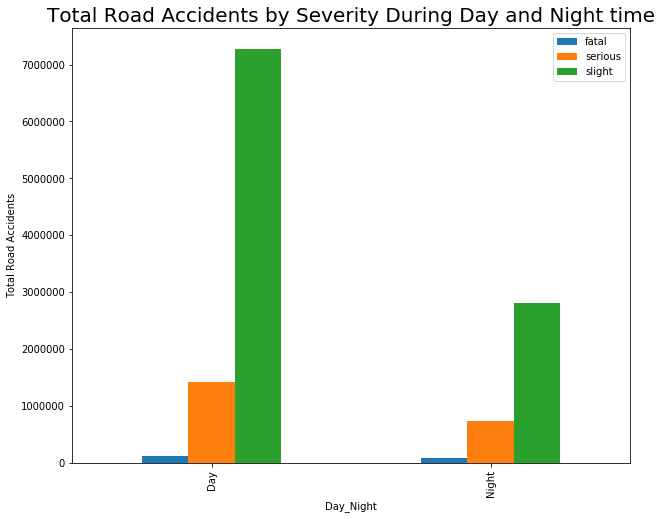

In [34]:
all_day_night_severity.plot(kind='bar', figsize=(10,8)).legend(bbox_to_anchor=(1,1))
plt.title('Total Road Accidents by Severity During Day and Night time', Fontsize=20)
plt.ylabel('Total Road Accidents')

We can see from above the break down of accident severity at both day time and night time.

However, as there are more accidents during the day, and we know that in real-life there are more people awake and driving during the day, we will need to normalise the data so that we can compare the accident severity for day and night.

I will do this below by dividing each column over the total accidents during day or night.

When we normalise, we are getting the sum of the all columns for each row in the dataset.

In [35]:
norm_day_night_severity = all_day_night_severity.copy() #create a copy of original dataframe 

In [36]:
cols_1 = all_day_night_severity.columns #define columns to normalise

In [37]:
sum_rows = norm_day_night_severity[cols_1].sum(axis=1) #calculate the sum of each row

In [38]:
norm_day_night_severity[cols_1] = norm_day_night_severity[cols_1].div(sum_rows, axis=0) #normalise all columns in the dataset by dividing them by the sum of each row

In [39]:
norm_day_night_severity[cols_1] = 100*norm_day_night_severity[cols_1] #multiply normalised data by 100 to get a percentage value.

Text(0,0.5,'% of Road Accidents')

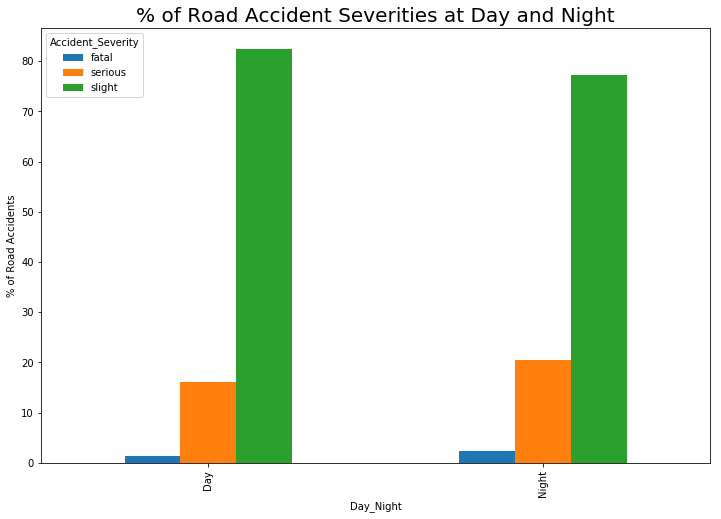

In [42]:
norm_day_night_severity.plot(kind='bar', figsize=(12,8))
plt.title('% of Road Accident Severities at Day and Night', fontsize=20)
plt.ylabel('% of Road Accidents')

We can now see that in fact, although more accidents occur during the day, the breakdown of accident severity during the day and night time are different.

We can see from the graph abode that there are slightly more fatal and serious accidents occuring at night time.

## 4.
## Day of Week 

Here, we will take a quick look at the day of the week on which most accidents occur.

In [43]:
num_by_day_1 = new_Q1B_1.groupby(
    ['Day_Night', 'Day_of_Week'])['Accident_Index'].count().unstack()

num_by_day_1

Day_of_Week,friday,monday,saturday,sunday,thursday,tuesday,wednesday
Day_Night,,,,,,,
Day,311924,203944,346394,283200,300424,302211,297164
Night,138012,138876,175604,159630,122238,114581,117541


In [44]:
num_by_day_2 = new_Q1B_2.groupby(
    ['Day_Night', 'Day_of_Week'])['Accident_Index'].count().unstack()

num_by_day_2

Day_of_Week,friday,monday,saturday,sunday,thursday,tuesday,wednesday
Day_Night,,,,,,,
Day,330055,209090,358153,282732,318724,312837,311260
Night,129373,124417,156302,141559,119491,112935,115003


In [45]:
num_by_day_3 = new_Q1B_3.groupby(
    ['Day_Night', 'Day_of_Week'])['Accident_Index'].count().unstack()

num_by_day_3

Day_of_Week,friday,monday,saturday,sunday,thursday,tuesday,wednesday
Day_Night,,,,,,,
Day,379356,238223,410780,309695,377160,371507,374003
Night,136859,131998,165166,149142,130073,120781,125897


In [46]:
num_by_day_4 = new_Q1B_4.groupby(
    ['Day_Night', 'Day_of_Week'])['Accident_Index'].count().unstack()

num_by_day_4

Day_of_Week,friday,monday,saturday,sunday,thursday,tuesday,wednesday
Day_Night,,,,,,,
Day,340712,210515,361215,263547,346569,327269,345009
Night,117008,109490,137043,125947,112909,103198,110465


## Aggregate the Data

Now we will concatenate the 4 datasets above into one.

In [47]:
all_by_day = pd.concat([num_by_day_1, num_by_day_2, num_by_day_3, num_by_day_4]).groupby(level=0).sum()
all_by_day

Day_of_Week,friday,monday,saturday,sunday,thursday,tuesday,wednesday
Day_Night,,,,,,,
Day,1362047,861772,1476542,1139174,1342877,1313824,1327436
Night,521252,504781,634115,576278,484711,451495,468906


In [48]:
total_by_day = all_by_day.copy() #create a copy of the original dataframe
total_by_day.loc['Total']= total_by_day.sum() #add a row which contains the total number of accidents in each column
total_by_day

Day_of_Week,friday,monday,saturday,sunday,thursday,tuesday,wednesday
Day_Night,,,,,,,
Day,1362047,861772,1476542,1139174,1342877,1313824,1327436
Night,521252,504781,634115,576278,484711,451495,468906
Total,1883299,1366553,2110657,1715452,1827588,1765319,1796342


From above, we can see that most accidents occur on Fridays and Saturdays. Below we will look at a further breakdown of this data.

## 4.1
## Normalising the data

As we did before, we will normalise the data by getting the number of accidents that occur during the daytime and night time for each day of the week to get a percentage.

This is important as there may be more people driving during the week, so we need to accurately compare the data.

In [49]:
norm_all_by_day = all_by_day.copy()

In [50]:
cols_2 = norm_all_by_day.columns #define columns to normalise

In [51]:
sum_rows_2 = norm_all_by_day[cols_2].sum(axis=1) #calculate the sum of each row

In [52]:
norm_all_by_day[cols_2] = norm_all_by_day[cols_2].div(sum_rows_2, axis=0) #normalise all columns in the dataset by dividing them by the sum of each row

In [53]:
norm_all_by_day[cols_2] = 100*norm_all_by_day[cols_2] #multiply normalised data by 100 to get a percentage value.

Text(0,0.5,'% of Road Accidents')

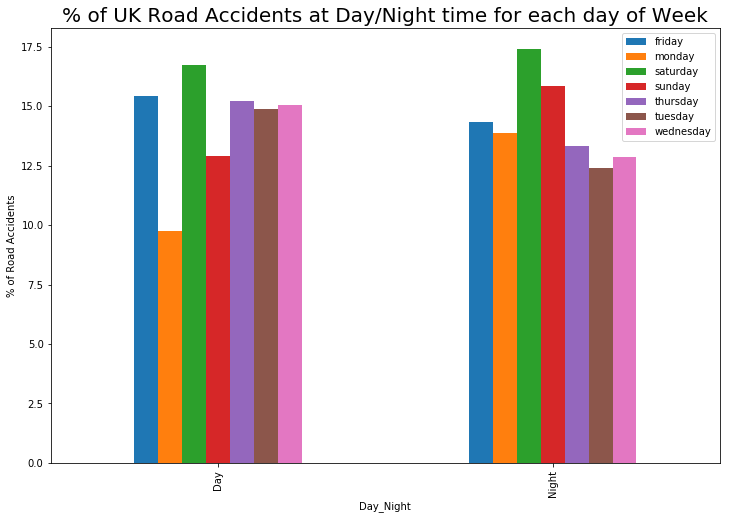

In [54]:
norm_all_by_day.plot(kind='bar', figsize=(12,8)).legend(bbox_to_anchor=(1,1))
plt.title('% of UK Road Accidents at Day/Night time for each day of Week', fontsize=20)
plt.ylabel('% of Road Accidents')

From the above graph, we can see that Fridays and Saturdays remain the days with the highest number of overall accidents at day time and night time, even after normalisation.

This graph gives us some other interesting insights such as there are a high number of road accidents at night time on Sundays and Mondays. There are also high numbers of daytime accidents for Thursdays, Wednesdays and Tuesdays, possibly due to large volumes of people commuting to work. This could be an area for future work.

## 5.
## Saving to Pickle Files & Creating Data Dictionaries

I will now save our grouped datasets into pickle files and create dictionaries to summarise their content.

In [31]:
all_day_night_severity.to_pickle("../../data/analysis/200_analysis_Q1B_all_day_night_severity.pkl")
all_day_night_severity.shape

(2, 3)

In [32]:
data_dictionary.save(
    '../../data/analysis/200_analysis_Q1B_all_day_night_severity.pkl', 
    "Updated Roadsafety dataset with Hour, Minute & Day_Night column").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,2.0,103296.0,2.822487e+04,83338.0,93317.0,103296.0,113275.0,123254.0,0,0.0
serious,2.0,1083783.0,4.793859e+05,744806.0,914294.5,1083783.0,1253271.5,1422760.0,0,0.0
slight,2.0,5045526.0,3.156711e+06,2813394.0,3929460.0,5045526.0,6161592.0,7277658.0,0,0.0


In [51]:
norm_day_night_severity.to_pickle("../../data/analysis/200_analysis_Q1B_norm_day_night_severity.pkl")
norm_day_night_severity.shape

(2, 3)

In [52]:
data_dictionary.save(
    '../../data/analysis/200_analysis_Q1B_norm_day_night_severity.pkl', 
    "Updated Roadsafety dataset with Hour, Minute & Day_Night column").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,2.0,1.842697,0.630515,1.396856,1.619777,1.842697,2.065618,2.288539,0,0.0
serious,2.0,18.288707,3.060859,16.124353,17.206530,18.288707,19.370884,20.453061,0,0.0
slight,2.0,79.868596,3.691374,77.258400,78.563498,79.868596,81.173693,82.478791,0,0.0


In [53]:
norm_all_by_day.to_pickle("../../data/analysis/200_analysis_Q1B_norm_all_by_day.pkl")
norm_all_by_day.shape

(2, 7)

In [54]:
data_dictionary.save(
    '../../data/analysis/200_analysis_Q1B_norm_all_by_day.pkl', 
    "Updated Roadsafety dataset with Hour, Minute & Day_Night column").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Day_of_Week,,,,,,,,,,
friday,2.0,14.875173,0.793530,14.314062,14.594617,14.875173,15.155728,15.436283,0,0.0
monday,2.0,11.814172,2.895716,9.766592,10.790382,11.814172,12.837963,13.861753,0,0.0
saturday,2.0,17.073628,0.480487,16.733872,16.903750,17.073628,17.243506,17.413384,0,0.0
sunday,2.0,14.367778,2.061002,12.910430,13.639104,14.367778,15.096452,15.825127,0,0.0
thursday,2.0,14.264819,1.349453,13.310612,13.787716,14.264819,14.741923,15.219027,0,0.0
